In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes = True)  #sets nice background color
import matplotlib.pyplot as pl
netflix =pd.read_csv('/content/drive/MyDrive/GlobalAiHub/Python-Netflix-DataAnalysis-main/NetflixOriginals.csv', encoding="latin-1")



In [3]:
#Viewing first few rows of the dataset
print(netflix.head())
#We have 6 column entries and 584 rows
print(netflix.shape)
#To understand more about the datatypes
print(netflix.info())

print(netflix.describe())
# 5-point summaey
#Average movie run time is 94 mins and average IMDB score is 6

# To find if there are any null values
print(pd.DataFrame( netflix.isnull().sum(), columns= ['Number of missing values']))
print()
netflix["Date"] = pd.to_datetime(netflix.Premiere)
print (netflix["Date"])

print("---------------------------------------------------------------------------------")

netflix['Year'] = netflix['Date'].dt.year
netflix['Month'] = netflix['Date'].dt.month
netflix['Day'] = netflix['Date'].dt.day_of_week
print(netflix.head())

print("---------------------------------------------------------------------------------")

             Title                  Genre           Premiere  Runtime  \
0  Enter the Anime            Documentary     August 5, 2019       58   
1      Dark Forces               Thriller    August 21, 2020       81   
2          The App  Science fiction/Drama  December 26, 2019       79   
3   The Open House        Horror thriller   January 19, 2018       94   
4      Kaali Khuhi                Mystery   October 30, 2020       90   

   IMDB Score          Language  
0         2.5  English/Japanese  
1         2.6           Spanish  
2         2.6           Italian  
3         3.2           English  
4         3.4             Hindi  
(584, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64 

Veri Setine Göre Uzun Soluklu Filmler Hangi Dilde Oluşturulmuştur? Görselleştirme Yapınız.
Uzun Soluklu Film 90 Ve Üstü Seçildi

                     Language                                        Title  \
3                     English                               The Open House   
4                       Hindi                                  Kaali Khuhi   
5                       Hindi                                        Drive   
6                     Turkish                            Leyla Everlasting   
7                     English              The Last Days of American Crime   
..                        ...                                          ...   
575                   Spanish        The Three Deaths of Marisela Escobedo   
576                   English                      Cuba and the Cameraman    
579                   English        Taylor Swift: Reputation Stadium Tour   
580  English/Ukranian/Russian  Winter on Fire: Ukraine's Fight for Freedom   
581          

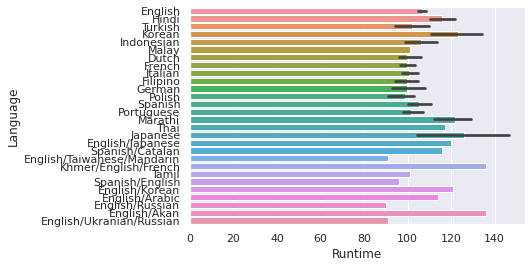

---------------------------------------------------------------------------------


In [4]:
print("Veri Setine Göre Uzun Soluklu Filmler Hangi Dilde Oluşturulmuştur? Görselleştirme Yapınız.")
print("Uzun Soluklu Film 90 Ve Üstü Seçildi\n")

find_long = netflix.where(netflix['Runtime'] >= 90)
find_long = find_long[["Language", "Title", "Runtime"]].dropna()
print(find_long)

#Görselleştirilmiş Hali
language_high_plot = sns.barplot(data = find_long, x='Runtime', y='Language')
pl.show()

print("---------------------------------------------------------------------------------")

2019 Ocak İle 2020 Haziran Tarihleri Arasında 'Documentary' Türünde Çekilmiş Filmlerin IMDB Değerlerini Bulup Görselleştiriniz.

       Year  IMDB Score                                      Title  \
0    2019.0         2.5                            Enter the Anime   
15   2019.0         4.3                             After the Raid   
20   2019.0         4.4          Hello Privilege. It's Me, Chelsea   
30   2019.0         4.6                                After Maria   
111  2019.0         5.5                       Ghosts of Sugar Land   
..      ...         ...                                        ...   
570  2020.0         8.1                             Rising Phoenix   
572  2020.0         8.2          Disclosure: Trans Lives on Screen   
575  2020.0         8.2      The Three Deaths of Marisela Escobedo   
582  2020.0         8.6  Emicida: AmarElo - It's All For Yesterday   
583  2020.0         9.0   David Attenborough: A Life on Our Planet   

           Genre  
0    Docume

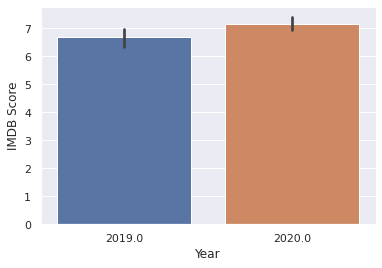

---------------------------------------------------------------------------------


In [5]:
print("2019 Ocak İle 2020 Haziran Tarihleri Arasında 'Documentary' Türünde Çekilmiş Filmlerin IMDB Değerlerini Bulup Görselleştiriniz.\n")
find_Documentary = netflix.where(netflix['Genre'] == 'Documentary')
find_Documentary_imdb = find_Documentary[["Year", "IMDB Score", "Title", "Genre"]]
find_Documentary_imdb_2019 = find_Documentary_imdb.where(netflix['Year'] == 2019)
find_Documentary_imdb_2020 = find_Documentary_imdb.where(netflix['Year'] == 2020)

find_Documentary_imdb_year = pd.concat([find_Documentary_imdb_2019, find_Documentary_imdb_2020])
find_Documentary_imdb_year = find_Documentary_imdb_year.dropna()
print(find_Documentary_imdb_year)

#Görselleştirilmiş Hali
find_Documentary_imdb_year_plot = sns.barplot(data = find_Documentary_imdb_year, x='Year', y='IMDB Score')
pl.show()

print("---------------------------------------------------------------------------------")

In [6]:
print("İngilizce Çekilen Filmler İçerisinde Hangi Tür En Yüksek IMDB Puanına Sahiptir?\n")
find_english_imdb = netflix.where(netflix['Language'] == 'English')
find_english_imdb = find_english_imdb[["Language", "Genre", "IMDB Score"]].dropna()
maks = find_english_imdb.max()
print(maks)

print("---------------------------------------------------------------------------------")

İngilizce Çekilen Filmler İçerisinde Hangi Tür En Yüksek IMDB Puanına Sahiptir?

Language           English
Genre         Zombie/Heist
IMDB Score             9.0
dtype: object
---------------------------------------------------------------------------------


In [7]:
print("'Hindi' Dilinde Çekilmiş Olan Filmlerin Ortalama 'Runtime' Süresi Nedir?\n")
find_Hindi = netflix.where(netflix['Language'] == 'Hindi')
find_Hindi = find_Hindi[["Year", "Language", "Title", "Runtime"]].dropna()
average = find_Hindi[["Runtime"]].mean()
print(find_Hindi)

print("---------------------------------------------------------------------------------")

'Hindi' Dilinde Çekilmiş Olan Filmlerin Ortalama 'Runtime' Süresi Nedir?

       Year Language                                  Title  Runtime
4    2020.0    Hindi                            Kaali Khuhi     90.0
5    2019.0    Hindi                                  Drive    147.0
9    2021.0    Hindi                     Sardar Ka Grandson    139.0
16   2020.0    Hindi                          Ghost Stories    144.0
23   2021.0    Hindi                  The Girl on the Train    120.0
45   2020.0    Hindi                     Mrs. Serial Killer    106.0
87   2020.0    Hindi         Gunjan Saxena: The Kargil Girl    112.0
97   2020.0    Hindi  Dolly Kitty and Those Twinkling Stars    120.0
100  2020.0    Hindi                                 Guilty    119.0
112  2019.0    Hindi                           House Arrest    104.0
147  2020.0    Hindi                       Ginny Weds Sunny    125.0
168  2020.0    Hindi                Choked: Paisa Bolta Hai    114.0
169  2020.0    Hindi         

Genre Kategorisi Kaç Tanedir?
115
Genre Kategorileri Nelerdir?

['Documentary' 'Thriller' 'Science fiction/Drama' 'Horror thriller'
 'Mystery' 'Action' 'Comedy' 'Heist film/Thriller'
 'Musical/Western/Fantasy' 'Drama' 'Romantic comedy' 'Action comedy'
 'Horror anthology' 'Political thriller' 'Superhero-Comedy' 'Horror'
 'Romance drama' 'Anime / Short' 'Superhero' 'Heist' 'Western'
 'Animation/Superhero' 'Family film' 'Action-thriller' 'Teen comedy-drama'
 'Romantic drama' 'Animation' 'Aftershow / Interview' 'Christmas musical'
 'Science fiction adventure' 'Science fiction' 'Variety show'
 'Comedy-drama' 'Comedy/Fantasy/Family' 'Supernatural drama'
 'Action/Comedy' 'Action/Science fiction' 'Romantic teenage drama'
 'Comedy / Musical' 'Musical' 'Science fiction/Mystery' 'Crime drama'
 'Psychological thriller drama' 'Adventure/Comedy' 'Black comedy'
 'Romance' 'Horror comedy' 'Christian musical' 'Romantic teen drama'
 'Family' 'Dark comedy' 'Comedy horror' 'Psychological thriller' 'Biopic

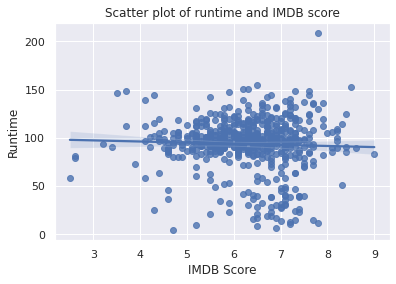

---------------------------------------------------------------------------------
IMDB Puanı En Yüksek Olan İlk 10 'Genre' Hangileridir?

Genre
Animation/Christmas/Comedy/Adventure    8.200000
Musical / Short                         7.700000
Concert Film                            7.633333
Anthology/Dark comedy                   7.600000
Animation / Science Fiction             7.500000
Making-of                               7.450000
Action-adventure                        7.300000
Coming-of-age comedy-drama              7.200000
Drama-Comedy                            7.200000
Historical drama                        7.200000
Name: IMDB Score, dtype: float64
---------------------------------------------------------------------------------
'Runtime' Değeri En Yüksek Olan İlk 10 Film Hangileridir?

                               Title  Runtime
561                     The Irishman      209
328                      Da 5 Bloods      155
581          Springsteen on Broadway      153
247     

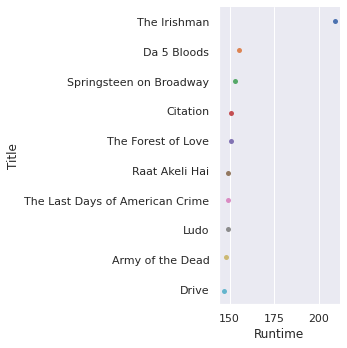

---------------------------------------------------------------------------------


In [8]:
print("Genre Kategorisi Kaç Tanedir?")
print(netflix['Genre'].nunique())

print("Genre Kategorileri Nelerdir?\n")
print(netflix['Genre'].unique())

print("---------------------------------------------------------------------------------")

print("Veri Setinde Kullanılan En Popüler 3 Dil\n")
top_3_lang = netflix.Language.value_counts().nlargest(3)
print(top_3_lang)

print("---------------------------------------------------------------------------------")

print("IMDB Puanı En Yüksek Olan İlk 10 Film\n")
top_10_movies = netflix[["IMDB Score", "Title",]].sort_values(["IMDB Score"], ascending=False)[:10]
print(top_10_movies)

print("---------------------------------------------------------------------------------")

print("IMDB Puanı İle 'Runtime' Arasında Nasıl Bir Korelasyon Vardır? İnceleyip Görselleştiriniz\n")
sns.regplot(data=netflix,x='IMDB Score',y='Runtime');
pl.title('Scatter plot of runtime and IMDB score');
pl.show()

print("---------------------------------------------------------------------------------")

print("IMDB Puanı En Yüksek Olan İlk 10 'Genre' Hangileridir?\n")
print(netflix.groupby("Genre")["IMDB Score"].mean().nlargest(10))

print("---------------------------------------------------------------------------------")

print("'Runtime' Değeri En Yüksek Olan İlk 10 Film Hangileridir?\n")
top_10_runtime = netflix[["Title", "Runtime"]].sort_values(["Runtime"], ascending=False)[:10]
print(top_10_runtime)

#Görsel Hali
sns.catplot(data = top_10_runtime, x='Runtime', y='Title')
pl.show()

print("---------------------------------------------------------------------------------")

Hangi Yılda En Fazla Film Fayımlanmıştır?

2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: Year, dtype: int64


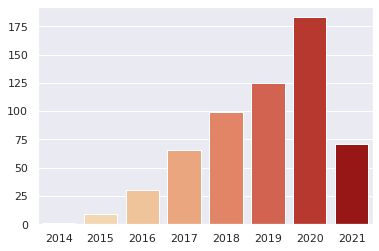

---------------------------------------------------------------------------------
IMDB Puanı En Düşük Olan 10 Film Ve Dili

Language
Malay               4.200000
English/Japanese    4.400000
Filipino            5.100000
Norwegian           5.100000
Polish              5.166667
Thai                5.450000
Swedish             5.500000
Italian             5.542857
Spanish/Basque      5.600000
German              5.640000
Name: IMDB Score, dtype: float64


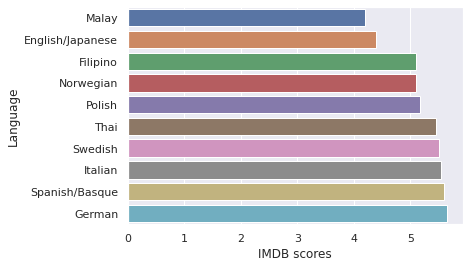

---------------------------------------------------------------------------------
Hangi Yılın Toplam 'Runtime' Süresi En Fazladır?

       Year                             Title  Runtime
304  2014.0                        My Own Man     81.0
553  2015.0               Beasts of No Nation    136.0
387  2016.0  Tony Robbins: I Am Not Your Guru    116.0
481  2017.0       First They Killed My Father    136.0
581  2018.0           Springsteen on Broadway    153.0
561  2019.0                      The Irishman    209.0
328  2020.0                       Da 5 Bloods    155.0
194  2021.0                  Army of the Dead    148.0


In [9]:
print("Hangi Yılda En Fazla Film Fayımlanmıştır?\n")
year = netflix.Year.value_counts()
print(year)

#Görselleştirilmiş hali
sns.barplot(x=year.index, y=year.values, palette="OrRd")
pl.show()

print("---------------------------------------------------------------------------------")

print("IMDB Puanı En Düşük Olan 10 Film Ve Dili\n")
imdblanguage=(netflix.groupby("Language")["IMDB Score"].mean().nsmallest(10))
print(imdblanguage)

#Görselleştirilmiş hali
imdblanguageplot = sns.barplot(x=imdblanguage.values, y=imdblanguage.index, orient='h')
imdblanguageplot.set(ylabel="Language", xlabel="IMDB scores")
pl.show()

print("---------------------------------------------------------------------------------")

print("Hangi Yılın Toplam 'Runtime' Süresi En Fazladır?\n")
find_year_runtime = netflix[["Year","Title", "Runtime"]]
find_year_runtime_year_s = find_year_runtime.drop(find_year_runtime.index[0:])

for x in range(2014,2022):

    find_year_runtime_year = find_year_runtime.where(netflix['Year'] == x)
    find_year_runtime_year = find_year_runtime_year[["Year","Title", "Runtime"]].sort_values(["Runtime"], ascending=False)[:1]
    find_year_runtime_year_s = pd.concat([find_year_runtime_year_s, find_year_runtime_year])
print(find_year_runtime_year_s)




In [10]:
# BT başlıyor

# Her bir dilin en fazla kullanıldığı "Genre" nedir?

print("Language Kategorisi Kaç Tanedir?")
print(netflix['Language'].nunique())

print("Language Kategorileri Nelerdir?\n")
print(netflix['Language'].unique())


Language Kategorisi Kaç Tanedir?
38
Language Kategorileri Nelerdir?

['English/Japanese' 'Spanish' 'Italian' 'English' 'Hindi' 'Turkish'
 'Korean' 'Indonesian' 'Malay' 'Dutch' 'French' 'English/Spanish'
 'Portuguese' 'Filipino' 'German' 'Polish' 'Norwegian' 'Marathi' 'Thai'
 'Swedish' 'Japanese' 'Spanish/Basque' 'Spanish/Catalan' 'English/Swedish'
 'English/Taiwanese/Mandarin' 'Thia/English' 'English/Mandarin' 'Georgian'
 'Bengali' 'Khmer/English/French' 'English/Hindi' 'Tamil'
 'Spanish/English' 'English/Korean' 'English/Arabic' 'English/Russian'
 'English/Akan' 'English/Ukranian/Russian']


In [11]:
?sns.barplot

Veri Setinde Kullanılan En Popüler 5 Dil

English    401
Hindi       33
Spanish     31
French      20
Italian     14
Name: Language, dtype: int64


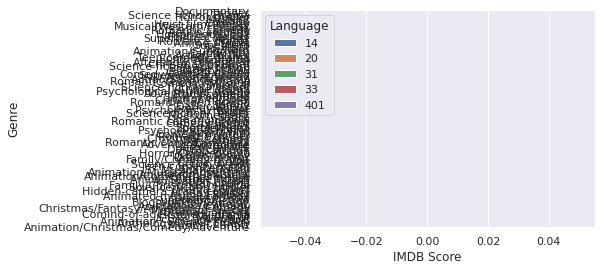

In [12]:
print("Veri Setinde Kullanılan En Popüler 5 Dil\n")
top_5_lang = netflix.Language.value_counts().nlargest(5)
print(top_5_lang)
sns.barplot(y="Genre",x="IMDB Score",hue=top_5_lang, data=netflix, orient="h"); #3 değişkenli, çoklu karşılaştırmalı

In [16]:
print("'İngilizce' Dilinde Çekilmiş Olan Filmler Hangileridir?\n")
genre_English = netflix.where(netflix['Language'] == 'English')
genre_English = genre_English[["Language", "Genre", "Title"]].dropna()
#avr_English = genre_English[["Runtime"]].mean()
print(genre_English)

print("---------------------------------------------------------------------------------")

'İngilizce' Dilinde Çekilmiş Olan Filmlerin hangileridir?

    Language                    Genre  \
3    English          Horror thriller   
7    English      Heist film/Thriller   
8    English  Musical/Western/Fantasy   
10   English              Documentary   
14   English                 Thriller   
..       ...                      ...   
577  English              Documentary   
578  English             Concert Film   
579  English             Concert Film   
581  English             One-man show   
583  English              Documentary   

                                          Title  
3                                The Open House  
7               The Last Days of American Crime  
8                                       Paradox  
10                         Searching for Sheela  
14                                        Mercy  
..                                          ...  
577                      Dancing with the Birds  
578  Ben Platt: Live from Radio City Music Hall 

[ 58  81  79  94  90 147 112 149  73 139  97 101  25 144 115 102 100  64
  99 120 105  89 107  95  37  83  46  85  88  86  80   4  93 106 103 119
  96 113 104  10  98 117  70 131  87  60 116  92 121  78 114  56  21  63
 126 142 108 125  91  49 118  34 124  52 111  75 148  32  23  53 132 123
 122 128  82  84  42 151  72  30 129  44 134 109  16  41  28  74   9 155
  55  40  17 136 130  19  54  76  39   7  57  14  31  48  27  45  36  47
 110 138 133 140  13  11  24  15  26 137  71 135  12 209  51 153]


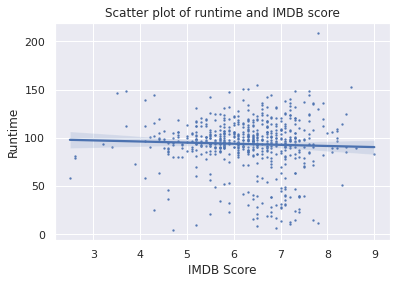

In [13]:
print(netflix['Runtime'].unique())
sns.regplot(data=netflix,x='IMDB Score',y='Runtime',scatter_kws={'s':2});
pl.title('Scatter plot of runtime and IMDB score');
pl.show()



Toplam film sayısı: 584
------
Boxplot chart of Runtime:


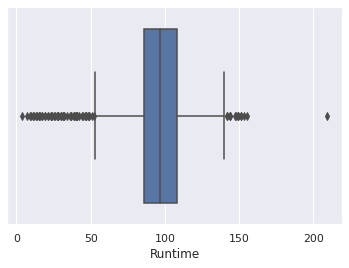

In [14]:
# Veri setinde outlier veri var mıdır? Açıklayınız.

runtime_nr=len(netflix.Runtime)
print("Toplam film sayısı:",runtime_nr)
print("------")
print("Boxplot chart of Runtime:")
sns.boxplot(x=netflix.Runtime);

In [15]:
# Runtime verisi üzerinde Outlier Analizi

outliers=[]
threshold=3
meanflix=np.mean(netflix.Runtime)
stdflix=np.std(netflix.Runtime)
print("Ortalama süre",meanflix, "dakikadır.")
print("---------------------------------------------------------------------")

q1=np.quantile(netflix.Runtime, 0.25)
q2=np.quantile(netflix.Runtime, 0.5)
q3=np.quantile(netflix.Runtime, 0.75)
iqr=q3-q1

print("Q1=",q1)
print("Q2=",q2)
print("Q3=",q3)
print("IQR=",iqr)
print("---------------------------------------------------------------------")

for y in netflix.Runtime:
  z_score = (y- meanflix)/stdflix
  if np.abs(z_score) > threshold:
    outliers.append(y)
#return outliers
print("Outlier veri olarak görülebilecek film süreleri:", outliers)
print("Bu değerler değerlendirmeye alınamayacak kadar küçük ve büyük değerlerdir.")


Ortalama süre 93.57705479452055 dakikadır.
---------------------------------------------------------------------
Q1= 86.0
Q2= 97.0
Q3= 108.0
IQR= 22.0
---------------------------------------------------------------------
Outlier veri olarak görülebilecek film süreleri: [4, 10, 9, 7, 209]
Bu değerler değerlendirmeye alınamayacak kadar küçük ve büyük değerlerdir.
